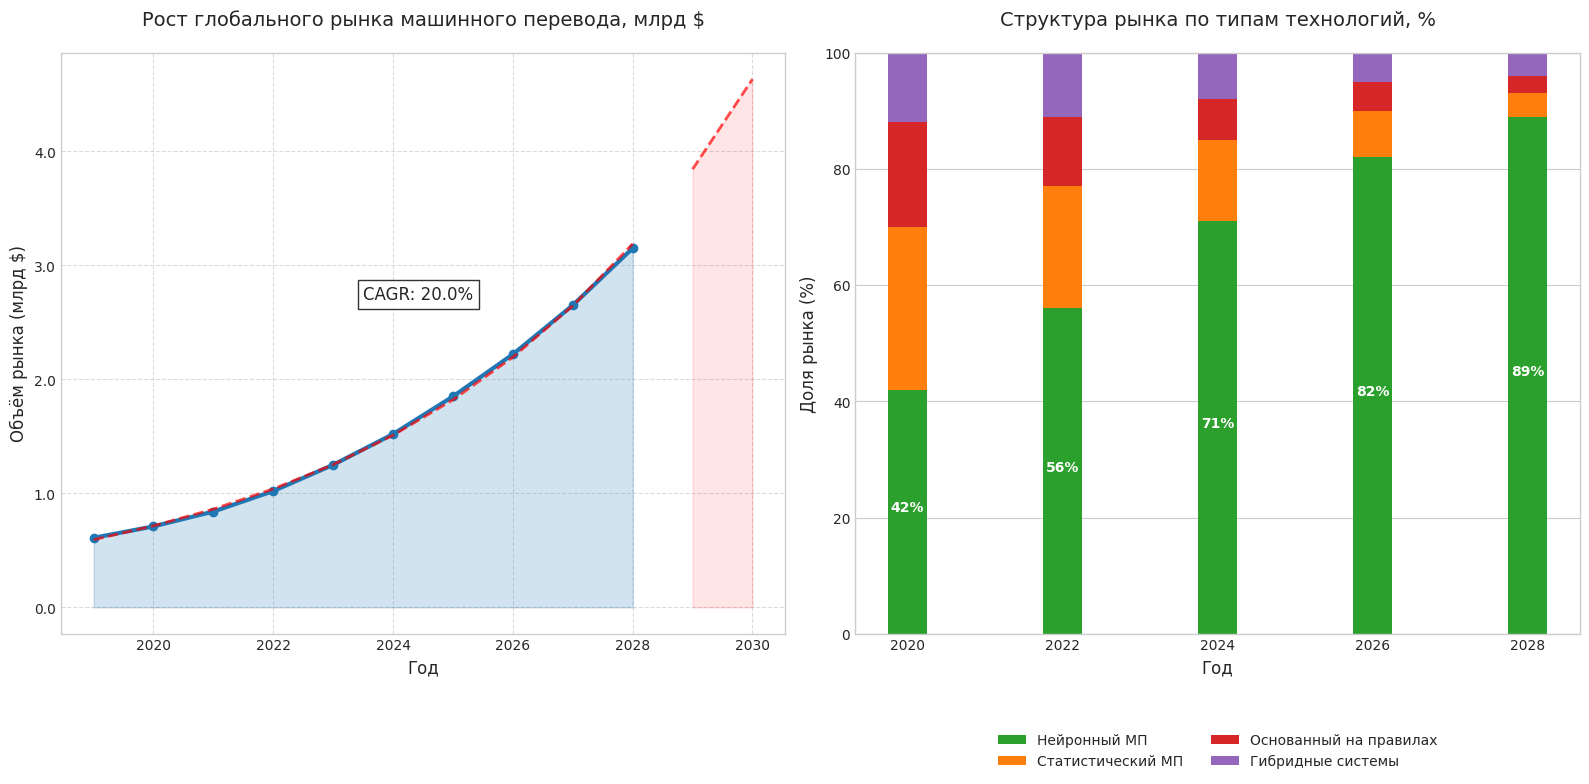

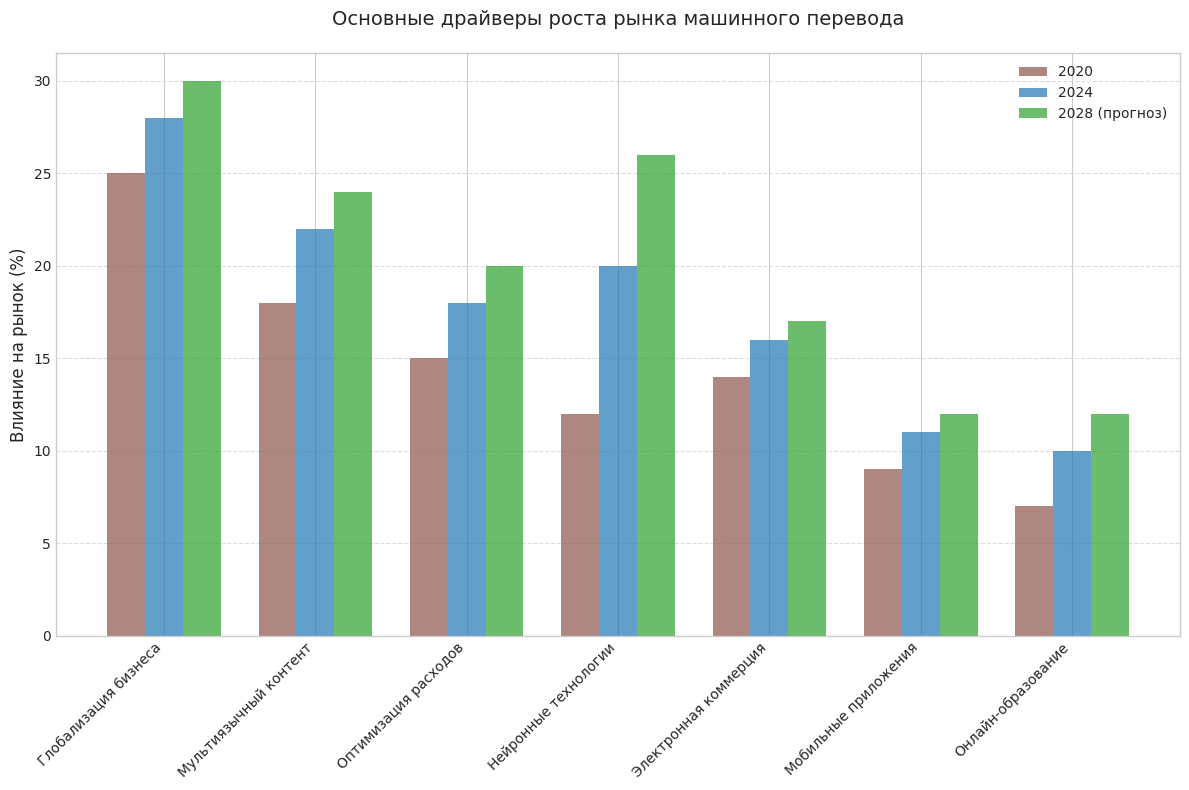

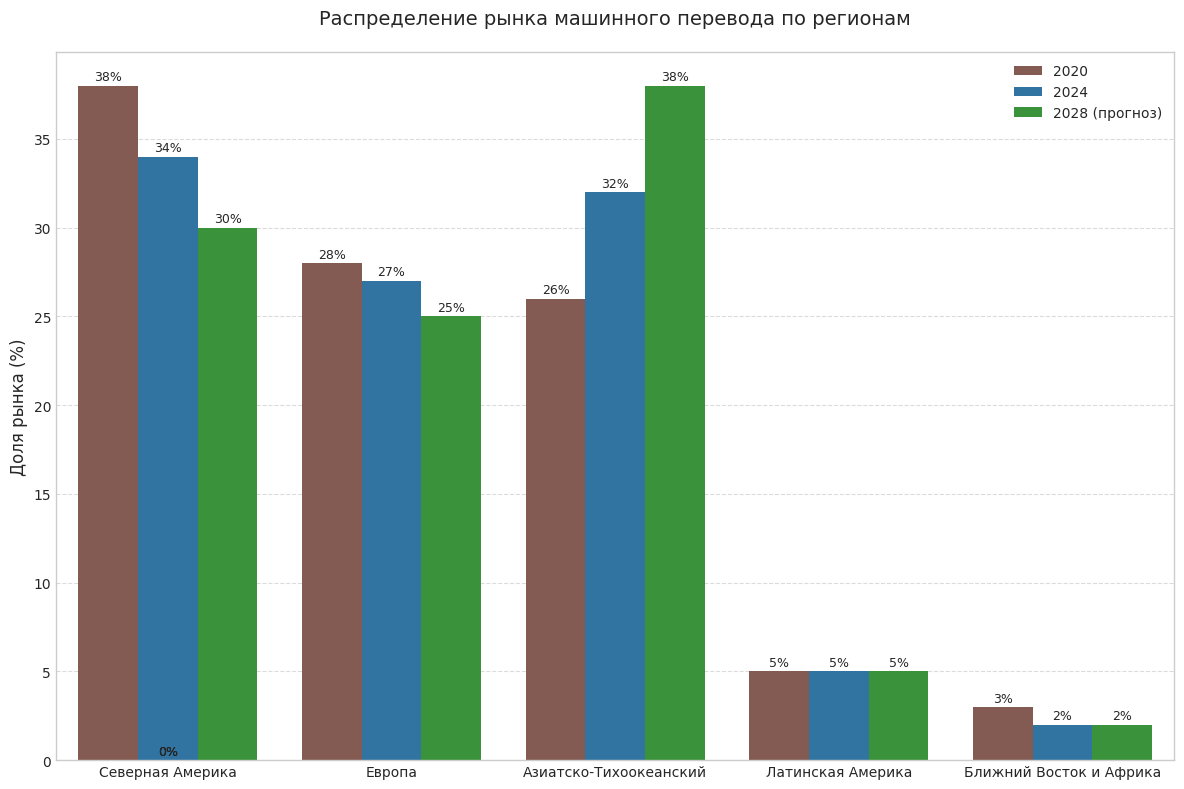

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Устанавливаем стиль
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Настраиваем шрифты для поддержки кириллицы
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Данные о росте рынка машинного перевода (млрд долларов США)
years = np.array([2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028])
market_size = np.array([0.61, 0.71, 0.84, 1.02, 1.25, 1.52, 1.85, 2.22, 2.65, 3.15])

# Данные о доле различных типов систем машинного перевода
years_segment = np.array([2020, 2022, 2024, 2026, 2028])
neural_mt = np.array([42, 56, 71, 82, 89])
statistical_mt = np.array([28, 21, 14, 8, 4])
rule_based_mt = np.array([18, 12, 7, 5, 3])
hybrid_mt = np.array([12, 11, 8, 5, 4])

# Создаем фигуру с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# График 1: Рост рынка машинного перевода
ax1.plot(years, market_size, marker='o', linewidth=3, color='#1f77b4')

# Экспоненциальная линия тренда
z = np.polyfit(years, np.log(market_size), 1)
p = np.poly1d(z)
ax1.plot(years, np.exp(p(years)), "r--", linewidth=2, alpha=0.7)

# Прогноз
forecast_years = np.array([2029, 2030])
forecast_values = np.exp(p(forecast_years))
ax1.plot(forecast_years, forecast_values, "r--", linewidth=2, alpha=0.7)

ax1.fill_between(years, 0, market_size, alpha=0.2, color='#1f77b4')
ax1.fill_between(forecast_years, 0, forecast_values, alpha=0.1, color='red')

# Добавляем CAGR
cagr = ((market_size[-1]/market_size[0])**(1/(len(years)-1)) - 1) * 100
ax1.text(2023.5, 2.7, f'CAGR: {cagr:.1f}%', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Форматируем оси
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))
ax1.set_title('Рост глобального рынка машинного перевода, млрд $', fontsize=14, pad=20)
ax1.set_xlabel('Год', fontsize=12)
ax1.set_ylabel('Объём рынка (млрд $)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# График 2: Изменение структуры рынка по типам технологий
width = 0.5
bottom = np.zeros(len(years_segment))

p1 = ax2.bar(years_segment, neural_mt, width, label='Нейронный МП', bottom=bottom, color='#2ca02c')
bottom += neural_mt

p2 = ax2.bar(years_segment, statistical_mt, width, label='Статистический МП', bottom=bottom, color='#ff7f0e')
bottom += statistical_mt

p3 = ax2.bar(years_segment, rule_based_mt, width, label='Основанный на правилах', bottom=bottom, color='#d62728')
bottom += rule_based_mt

p4 = ax2.bar(years_segment, hybrid_mt, width, label='Гибридные системы', bottom=bottom, color='#9467bd')

# Добавляем проценты для нейронного МП
for i, v in enumerate(neural_mt):
    ax2.text(years_segment[i], v/2, f"{v}%", ha='center', fontsize=10, color='white', fontweight='bold')

ax2.set_title('Структура рынка по типам технологий, %', fontsize=14, pad=20)
ax2.set_xlabel('Год', fontsize=12)
ax2.set_ylabel('Доля рынка (%)', fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.savefig('market_growth_and_segments.png', dpi=300, bbox_inches='tight')
plt.show()

# Создаем второй график: драйверы роста рынка машинного перевода
plt.figure(figsize=(12, 8))

# Данные о драйверах роста (влияние на рынок в %)
drivers = [
    'Глобализация бизнеса', 
    'Мультиязычный контент', 
    'Оптимизация расходов', 
    'Нейронные технологии',
    'Электронная коммерция', 
    'Мобильные приложения',
    'Онлайн-образование'
]

impact_2020 = [25, 18, 15, 12, 14, 9, 7]
impact_2024 = [28, 22, 18, 20, 16, 11, 10]
impact_2028 = [30, 24, 20, 26, 17, 12, 12]

x = np.arange(len(drivers))
width = 0.25

plt.bar(x - width, impact_2020, width, label='2020', color='#8c564b', alpha=0.7)
plt.bar(x, impact_2024, width, label='2024', color='#1f77b4', alpha=0.7)
plt.bar(x + width, impact_2028, width, label='2028 (прогноз)', color='#2ca02c', alpha=0.7)

plt.ylabel('Влияние на рынок (%)', fontsize=12)
plt.title('Основные драйверы роста рынка машинного перевода', fontsize=14, pad=20)
plt.xticks(x, drivers, rotation=45, ha='right')
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('growth_drivers.png', dpi=300, bbox_inches='tight')
plt.show()

# Третий график: рынок по регионам
plt.figure(figsize=(12, 8))

# Данные о региональном распределении рынка (%)
regions = ['Северная Америка', 'Европа', 'Азиатско-Тихоокеанский', 'Латинская Америка', 'Ближний Восток и Африка']
share_2020 = [38, 28, 26, 5, 3]
share_2024 = [34, 27, 32, 5, 2]
share_2028 = [30, 25, 38, 5, 2]

# Создаем данные для графика
df = pd.DataFrame({
    'Регион': regions * 3,
    'Год': ['2020'] * 5 + ['2024'] * 5 + ['2028 (прогноз)'] * 5,
    'Доля': share_2020 + share_2024 + share_2028
})

# Создаем столбчатую диаграмму
sns.barplot(x='Регион', y='Доля', hue='Год', data=df, palette=['#8c564b', '#1f77b4', '#2ca02c'])

plt.title('Распределение рынка машинного перевода по регионам', fontsize=14, pad=20)
plt.xlabel('')
plt.ylabel('Доля рынка (%)', fontsize=12)
plt.legend(title='')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2., height + 0.3, f'{int(height)}%',
                ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('regional_distribution.png', dpi=300, bbox_inches='tight')
plt.show()